In [1]:
import tqdm
import numpy as np

import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from functions import train_model, ImagePlotter
import matplotlib.pyplot as plt

import itertools

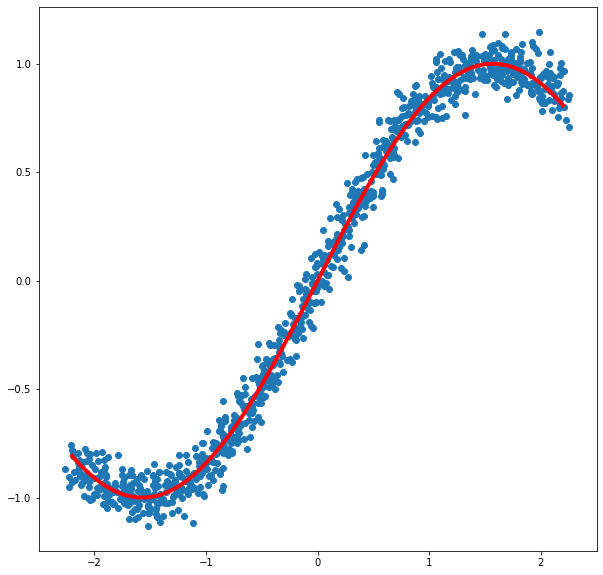

In [2]:
x1 = np.linspace(-2.2, 2.2, 1000)
fx = np.sin(x1)
dots = np.vstack([x1, fx]).T
noise = 0.06 * np.random.randn(*dots.shape)
dots += noise

dots = dots.astype(np.float32)

size = 25
colors = ["r", "g", "c", "y", "m"]
idxs = range(0, x1.shape[0], x1.shape[0] // size)
vx1 = x1[idxs]
vdots = dots[idxs]

plt.figure(figsize=(10, 10))
plt.xlim([-2.5, 2.5])
plt.scatter(dots[:, 0], dots[:, 1])
plt.plot(x1, fx,  color="red", linewidth=4)
plt.grid(False)


In [3]:
class LinearAE(torch.nn.Module):
    def __init__(self, num_features: int = 2):
        super(LinearAE, self).__init__()
        self.fc0 = torch.nn.Linear(in_features=2, out_features=1)
        self.fc1 = torch.nn.Linear(in_features=1, out_features=2)
        
    def forward(self, x: torch.tensor) -> torch.tensor:
        x = self.fc0(x)
        x = self.fc1(x)
        return x

In [4]:
model = LinearAE()
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [5]:
input_dots = torch.from_numpy(dots)

In [6]:
def train_dots(model, optimizer, loss_fn, dots, mode="train"):
    if mode == "train":
        model.train()
    else:
        model.eval
        
    total_loss = 0
    if mode == 'train':
        optimizer.zero_grad()
    model_outs = model(dots)
    loss = loss_fn(model_outs, dots)
    if mode == "train":
        loss.backward()
        optimizer.step()
            
    total_loss = loss.item()
        
    return model, optimizer, total_loss

In [7]:
for i in range(50):
    model, optimizer, loss_v = train_dots(model, optimizer, loss, input_dots)

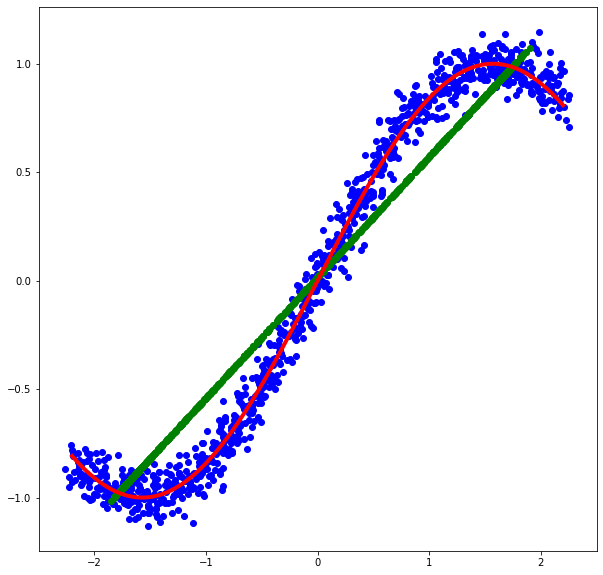

In [8]:
predicted_dots = model(input_dots).detach().numpy()
plt.figure(figsize=(10, 10))
plt.xlim([-2.5, 2.5])
plt.scatter(dots[:, 0], dots[:, 1], color="blue")
plt.plot(x1, fx,  color="red", linewidth=4)
plt.scatter(predicted_dots[:, 0], predicted_dots[:, 1], color="green")
plt.grid(False)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(1)
predicted_dots_pca = pca.inverse_transform(pca.fit_transform(dots))

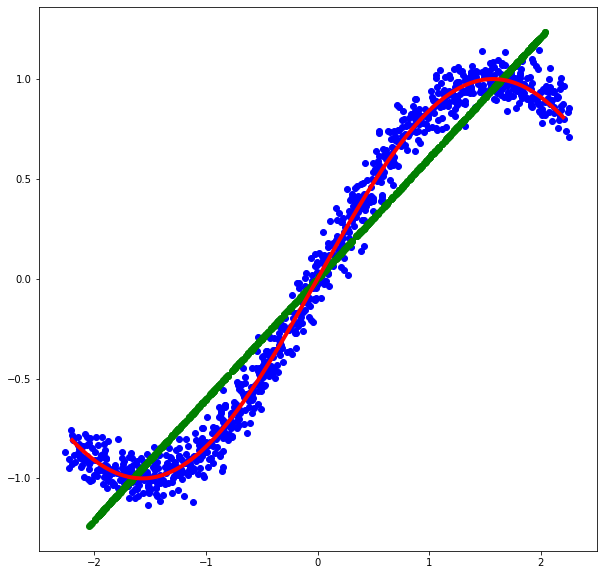

In [10]:
predicted_dots = model(input_dots).detach().numpy()
plt.figure(figsize=(10, 10))
plt.xlim([-2.5, 2.5])
plt.scatter(dots[:, 0], dots[:, 1], color="blue")
plt.plot(x1, fx,  color="red", linewidth=4)
plt.scatter(predicted_dots_pca[:, 0], predicted_dots_pca[:, 1], color="green")
plt.grid(False)